In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# To Do

1. Generate circle data
2. Choose the best network
3. Variance error (Test error - Train Error)
4. Regularization

## Generate circle data

In [120]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.6, random_state=40)

In [121]:
X = pd.DataFrame(X)

In [122]:
X.shape, y.shape

((1000, 2), (1000,))

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
X_train = X_train*5.0
X_test = X_test*5.0

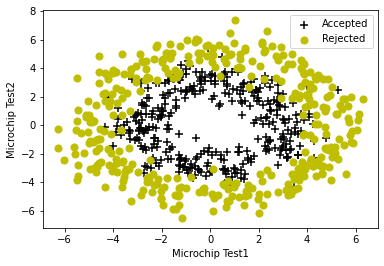

In [125]:
mask = y_train == 1
passed = plt.scatter(X_train[mask][0].values, X_train[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X_train[~mask][0].values, X_train[~mask][1].values, s=50, c='y', marker='o',)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Accepted', 'Rejected'))
plt.show()

In [147]:
model_0000 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0001 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0002 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0003 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0004 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0005 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0006 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [148]:
model_0000.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0001.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0002.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0003.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0004.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0005.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0006.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [149]:
epochs = 1000

# verbose options
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.
verbose = 0

history_0000 = model_0000.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0001 = model_0001.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0002 = model_0002.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0003 = model_0003.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0004 = model_0004.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0005 = model_0005.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0006 = model_0006.fit(X_train, y_train, epochs=epochs, verbose=verbose)

## Choose the best model

In [150]:
print("0000 : ", history_0000.history['accuracy'][-7:])
print("0001 : ", history_0001.history['accuracy'][-7:])
print("0002 : ", history_0002.history['accuracy'][-7:])
print("0003 : ", history_0003.history['accuracy'][-7:])
print("0004 : ", history_0004.history['accuracy'][-7:])
print("0005 : ", history_0005.history['accuracy'][-7:])
print("0006 : ", history_0006.history['accuracy'][-7:])

0000 :  [0.9285714030265808, 0.9328571557998657, 0.9285714030265808, 0.9328571557998657, 0.9300000071525574, 0.927142858505249, 0.9285714030265808]
0001 :  [0.9357143044471741, 0.9328571557998657, 0.9257143139839172, 0.9285714030265808, 0.9342857003211975, 0.9257143139839172, 0.9300000071525574]
0002 :  [0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053]
0003 :  [0.9114285707473755, 0.9142857193946838, 0.9128571152687073, 0.9142857193946838, 0.9142857193946838, 0.9114285707473755, 0.9114285707473755]
0004 :  [0.9742857217788696, 0.9728571176528931, 0.9628571271896362, 0.9685714244842529, 0.9642857313156128, 0.9642857313156128, 0.9728571176528931]
0005 :  [0.9557142853736877, 0.9557142853736877, 0.9571428298950195, 0.9585714340209961, 0.954285740852356, 0.9571428298950195, 0.9599999785423279]
0006 :  [0.9571428298950195, 0.9571428298950195, 0.9671428799629211, 0.9642857313156128, 0.9642857313156128,

In [151]:
result_0004 = model_0004.evaluate(X_test, y_test, verbose=verbose)
result_0005 = model_0005.evaluate(X_test, y_test, verbose=verbose)
result_0006 = model_0006.evaluate(X_test, y_test, verbose=verbose)

In [152]:
print('*****Train Results*****')
print('0004 :', str(round(history_0004.history['accuracy'][-1], 2) * 100) + '%')
print('0005 :', str(round(history_0005.history['accuracy'][-1], 2) * 100) + '%')
print('0006 :', str(round(history_0006.history['accuracy'][-1], 2) * 100) + '%')

print('*****Test Results*****')
print("0004 :", str(round(result_0004[1], 2)*100) + '%')
print("0005 :", str(round(result_0005[1], 2)*100) + '%')
print("0006 :", str(round(result_0006[1], 2)*100) + '%')

*****Train Results*****
0004 : 97.0%
0005 : 96.0%
0006 : 97.0%
*****Test Results*****
0004 : 86.0%
0005 : 87.0%
0006 : 87.0%


## Variance Problem

In [153]:
print('0004 : [Train Error] - [Test Error] =', str(round(history_0004.history['accuracy'][-1] - result_0004[1], 3)*100) + '%')
print('0005 : [Train Error] - [Test Error] =', str(round(history_0005.history['accuracy'][-1] - result_0005[1], 3)*100) + '%')
print('0006 : [Train Error] - [Test Error] =', str(round(history_0006.history['accuracy'][-1] - result_0006[1], 3)*100) + '%')

0004 : [Train Error] - [Test Error] = 11.0%
0005 : [Train Error] - [Test Error] = 9.3%
0006 : [Train Error] - [Test Error] = 9.700000000000001%


## Regularization

In [176]:
model_0005_0000 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0005_0001 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0005_0011 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0005_0111 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(1, activation='sigmoid')
])

model_0005_1111 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(3.00)),
    keras.layers.Dense(1, activation='sigmoid')
])

In [177]:
model_0005_0000.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0005_0001.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0005_0011.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0005_0111.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0005_1111.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [178]:
epochs = 1000

# verbose options
# 0 = silent, 
# 1 = progress bar, 
# 2 = one line per epoch.
verbose = 0

history_0005_0000 = model_0005_0000.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0005_0001 = model_0005_0001.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0005_0011 = model_0005_0011.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0005_0111 = model_0005_0111.fit(X_train, y_train, epochs=epochs, verbose=verbose)
history_0005_1111 = model_0005_1111.fit(X_train, y_train, epochs=epochs, verbose=verbose)

In [179]:
print("0005_0000 : ", history_0005_0000.history['accuracy'][-7:])
print("0005_0001 : ", history_0005_0001.history['accuracy'][-7:])
print("0005_0011 : ", history_0005_0011.history['accuracy'][-7:])
print("0005_0111 : ", history_0005_0111.history['accuracy'][-7:])
print("0005_1111 : ", history_0005_1111.history['accuracy'][-7:])

0005_0000 :  [0.9657142758369446, 0.9642857313156128, 0.9657142758369446, 0.9571428298950195, 0.9557142853736877, 0.9671428799629211, 0.9685714244842529]
0005_0001 :  [0.9257143139839172, 0.9385714530944824, 0.9257143139839172, 0.9342857003211975, 0.9357143044471741, 0.9371428489685059, 0.9399999976158142]
0005_0011 :  [0.9142857193946838, 0.904285728931427, 0.9114285707473755, 0.9128571152687073, 0.9214285612106323, 0.9214285612106323, 0.9214285612106323]
0005_0111 :  [0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053]
0005_1111 :  [0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053, 0.5171428322792053]


In [180]:
result_0005_0000 = model_0005_0000.evaluate(X_test, y_test, verbose=verbose)
result_0005_0001 = model_0005_0001.evaluate(X_test, y_test, verbose=verbose)
result_0005_0011 = model_0005_0011.evaluate(X_test, y_test, verbose=verbose)
result_0005_0111 = model_0005_0111.evaluate(X_test, y_test, verbose=verbose)
result_0005_1111 = model_0005_1111.evaluate(X_test, y_test, verbose=verbose)

In [181]:
print('*****Train Results*****')
print('0005_0000 :', str(round(history_0005_0000.history['accuracy'][-1], 2) * 100) + '%')
print('0005_0001 :', str(round(history_0005_0001.history['accuracy'][-1], 2) * 100) + '%')
print('0005_0011 :', str(round(history_0005_0011.history['accuracy'][-1], 2) * 100) + '%')
print('0005_0111 :', str(round(history_0005_0111.history['accuracy'][-1], 2) * 100) + '%')
print('0005_1111 :', str(round(history_0005_1111.history['accuracy'][-1], 2) * 100) + '%')

print('*****Test Results*****')
print("0005_0000 :", str(round(result_0005_0000[1], 2)*100) + '%')
print("0005_0001 :", str(round(result_0005_0001[1], 2)*100) + '%')
print("0005_0011 :", str(round(result_0005_0011[1], 2)*100) + '%')
print("0005_0111 :", str(round(result_0005_0111[1], 2)*100) + '%')
print("0005_1111 :", str(round(result_0005_1111[1], 2)*100) + '%')

*****Train Results*****
0005_0000 : 97.0%
0005_0001 : 94.0%
0005_0011 : 92.0%
0005_0111 : 52.0%
0005_1111 : 52.0%
*****Test Results*****
0005_0000 : 88.0%
0005_0001 : 87.0%
0005_0011 : 88.0%
0005_0111 : 46.0%
0005_1111 : 46.0%


### Results
<h4>[Train error] - [Test error]</h4>

> '??' == (accuracy < 50%)  

|model|param=0.01|0.1|1.0|3.0|
|-----|----------|---|---|---|
|0000|10%|6%|9%|9%|
|0001|8%|8%|5%|7%|
|0011|8%|6%|3%|4%|
|0111|3%|5%|??%|??%|
|1111|6%|??%|??%|??%|